In [1]:
import torch
import torchvision
from torchvision.datasets import FashionMNIST

In [2]:
# Download training dataset
dataset = FashionMNIST(root='data/', download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
# Download test dataset
test_dataset = FashionMNIST(root='data/', train=False)

In [4]:
print(len(dataset))
print(len(test_dataset))

60000
10000


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

Label: 9


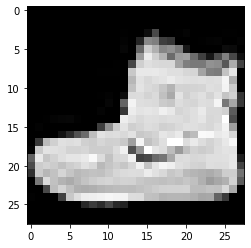

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [8]:
import torchvision.transforms as transforms

In [9]:
# MNIST dataset (images and labels)
dataset = FashionMNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 9


In [11]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [12]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [13]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

In [14]:
import torch.nn.functional as F

In [15]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [16]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [17]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [18]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [19]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.7227, val_acc: 0.6090
Epoch [1], val_loss: 1.4343, val_acc: 0.6555
Epoch [2], val_loss: 1.2677, val_acc: 0.6645
Epoch [3], val_loss: 1.1604, val_acc: 0.6699
Epoch [4], val_loss: 1.0854, val_acc: 0.6791


In [20]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.0296, val_acc: 0.6880
Epoch [1], val_loss: 0.9862, val_acc: 0.6931
Epoch [2], val_loss: 0.9513, val_acc: 0.7017
Epoch [3], val_loss: 0.9223, val_acc: 0.7110
Epoch [4], val_loss: 0.8978, val_acc: 0.7172


In [21]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8767, val_acc: 0.7246
Epoch [1], val_loss: 0.8583, val_acc: 0.7289
Epoch [2], val_loss: 0.8419, val_acc: 0.7360
Epoch [3], val_loss: 0.8274, val_acc: 0.7366
Epoch [4], val_loss: 0.8141, val_acc: 0.7421


In [22]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8021, val_acc: 0.7460
Epoch [1], val_loss: 0.7912, val_acc: 0.7504
Epoch [2], val_loss: 0.7810, val_acc: 0.7530
Epoch [3], val_loss: 0.7717, val_acc: 0.7554
Epoch [4], val_loss: 0.7629, val_acc: 0.7581


In [23]:
history5 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7549, val_acc: 0.7603
Epoch [1], val_loss: 0.7473, val_acc: 0.7626
Epoch [2], val_loss: 0.7402, val_acc: 0.7653
Epoch [3], val_loss: 0.7337, val_acc: 0.7662
Epoch [4], val_loss: 0.7272, val_acc: 0.7681


In [24]:
history6 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7213, val_acc: 0.7694
Epoch [1], val_loss: 0.7157, val_acc: 0.7720
Epoch [2], val_loss: 0.7103, val_acc: 0.7735
Epoch [3], val_loss: 0.7052, val_acc: 0.7743
Epoch [4], val_loss: 0.7003, val_acc: 0.7761


In [25]:
history7 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6957, val_acc: 0.7777
Epoch [1], val_loss: 0.6914, val_acc: 0.7780
Epoch [2], val_loss: 0.6870, val_acc: 0.7793
Epoch [3], val_loss: 0.6829, val_acc: 0.7811
Epoch [4], val_loss: 0.6790, val_acc: 0.7824


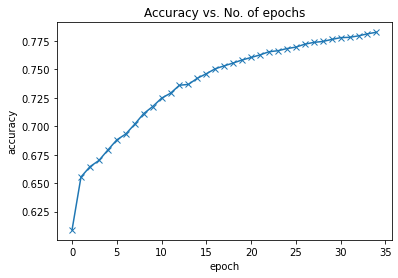

In [26]:
history =  history1 + history2 + history3 + history4 + history5 + history6 + history7 
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [27]:
# Define test dataset
test_dataset = FashionMNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

In [28]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6819130182266235, 'val_acc': 0.7743164300918579}

In [29]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 9 , Predicted: 9


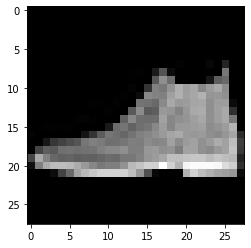

In [30]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 1 , Predicted: 1


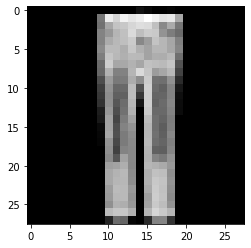

In [31]:
img, label = test_dataset[15]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 8 , Predicted: 8


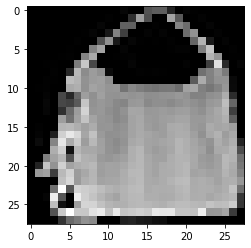

In [32]:
img, label = test_dataset[9500]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 6 , Predicted: 2


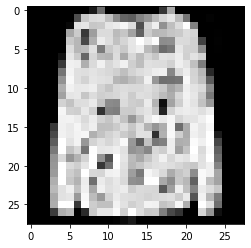

In [33]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))